In [1]:
%%time
from syntheticDBN import Bayes_Test
import pandas as pd
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb
%matplotlib widget

Wall time: 2.15 s


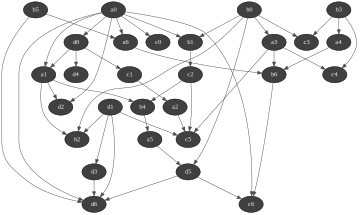

Wall time: 187 ms


In [2]:
%%time
# Create True DBN
timesteps = 7
nodes = 4
bayestest = Bayes_Test(timesteps=timesteps, nodes=nodes, type='close') 

gnb.show(bayestest.true_dbn)

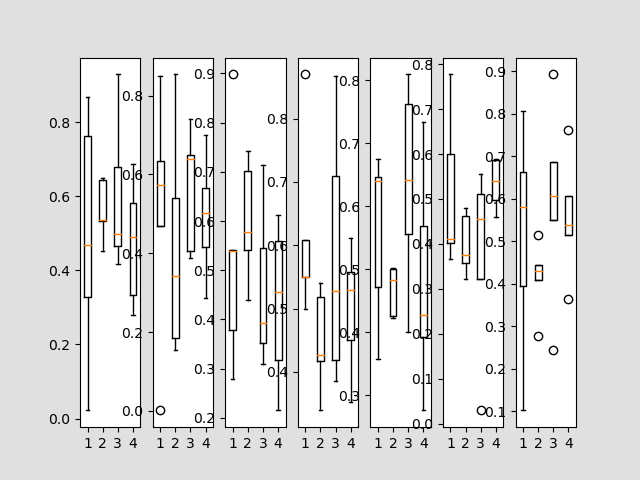

Wall time: 21.5 s


,a6.1,b6.1,c6.1,d6.1,a6.2,b6.2,c6.2,d6.2,a6.3,b6.3,...,c6.5,d6.5,a6.6,b6.6,c6.6,d6.6,a6.7,b6.7,c6.7,d6.7
0,0.869,0.533,0.679,0.582,0.001,0.154,0.650,0.565,0.540,0.541,...,0.400,0.427,0.600,0.479,0.511,0.586,0.663,0.516,0.893,0.538
1,0.468,0.537,0.467,0.279,0.574,0.540,0.639,0.501,0.378,0.701,...,0.809,0.392,0.366,0.357,0.322,0.589,0.808,0.444,0.606,0.364
2,0.327,0.643,0.499,0.688,0.635,0.854,0.405,0.416,0.279,0.440,...,0.556,0.276,0.411,0.376,0.030,0.460,0.580,0.277,0.686,0.606
3,0.763,0.452,0.929,0.491,0.468,0.186,0.387,0.286,0.542,0.578,...,0.641,0.733,0.403,0.462,0.456,0.539,0.396,0.431,0.550,0.762
4,0.022,0.648,0.417,0.334,0.850,0.343,0.741,0.700,0.898,0.743,...,0.762,0.569,0.777,0.323,0.556,0.498,0.102,0.409,0.244,0.514


In [3]:
%%time
# Score classifiers
targets = list(sorted(bayestest.true_dbn.names(), key=lambda x: x[::-1]))[-nodes:]

scores = pd.DataFrame()
fig, axs = plt.subplots(1, timesteps)

for timestep in range(1, timesteps + 1):
    score = bayestest.time_test(targets=targets, timesteps=timestep, structure='hill')
    scores = pd.concat([scores, score], axis=1)
    
    axs[timestep-1].boxplot(score)

plt.show()
scores

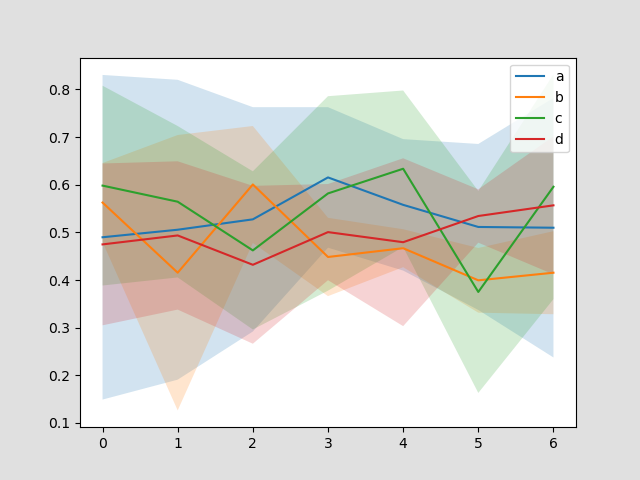

,a6.1,b6.1,c6.1,d6.1,a6.2,b6.2,c6.2,d6.2,a6.3,b6.3,...,c6.5,d6.5,a6.6,b6.6,c6.6,d6.6,a6.7,b6.7,c6.7,d6.7
Mean,0.489800,0.562600,0.598200,0.474800,0.50560,0.415400,0.56440,0.493600,0.527400,0.600600,...,0.633600,0.479400,0.511400,0.399400,0.375000,0.534400,0.509800,0.415400,0.595800,0.556800
STD,0.340678,0.082948,0.209669,0.169831,0.31467,0.289003,0.15887,0.155622,0.235446,0.122692,...,0.164239,0.176137,0.174188,0.067892,0.211927,0.055958,0.272292,0.087145,0.235812,0.144814


In [4]:
mean_scores = pd.DataFrame([scores.mean(), scores.std()], index=['Mean','STD'])

line_scores = {}
line_min = {}
line_max = {}
for i, v in mean_scores.squeeze().items():
    if i[0] in line_scores.keys():
        line_scores[i[0]].append(v[0])
        line_min[i[0]].append(v[0] - v[1])
        line_max[i[0]].append(v[0] + v[1])
    else:
        line_scores[i[0]] = [v[0]]
        line_min[i[0]] = [v[0] - v[1]]
        line_max[i[0]] = [v[0] + v[1]]

plt.figure()
# colors = ['blue', 'red', 'green', 'purple', 'yellow', 'orange', 'cyan']
for key, data in line_scores.items():
    plt.plot(data, label=key)
    plt.fill_between(range(len(data)), line_min[key], line_max[key], alpha=0.2)
plt.legend()
plt.show()

mean_scores